# Building a Simple Neural Network from Scratch for MNIST Digit Recognition without using TensorFlow/PyTorch only using Numpy

https://medium.com/@ombaval/building-a-simple-neural-network-from-scratch-for-mnist-digit-recognition-without-using-7005a7733418

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
data = pd.read_csv("mnist_train_full.csv")

In [3]:
# Data preprocessing
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

# Normalize the pixel values
data_dev = data[0:1000].T
Y_dev = data_dev[-1]  
X_dev = data_dev[0:n-1]  
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[-1]  
X_train = data_train[0:n-1]  
X_train = X_train / 255.
_, m_train = X_train.shape

print(f"Y_train unique: {np.unique(Y_train)}")
print(f"Y_dev unique: {np.unique(Y_dev)}")
print(f"X_train shape: {X_train.shape}")
print(f"X_dev shape: {X_dev.shape}")

Y_train unique: [0 1 2 3 4 5 6 7 8 9]
Y_dev unique: [0 1 2 3 4 5 6 7 8 9]
X_train shape: (784, 59000)
X_dev shape: (784, 1000)


In [4]:
# Initialize parameters
def init_params():
    w1 = np.random.rand(64, 784) - 0.5
    b1 = np.random.rand(64, 1) - 0.5
    w2 = np.random.rand(10, 64) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

In [5]:
# Define activation functions
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Forward propagation
def forward_prop(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

In [6]:
# Backpropagation
def back_prop(z1, a1, z2, a2, w2, Y, X):
    m_batch = X.shape[1]  
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    dZ2 = a2 - one_hot_Y
    dW2 = 1/m_batch * dZ2.dot(a1.T) 
    db2 = 1/m_batch * np.sum(dZ2, axis=1, keepdims=True)  
    dZ1 = w2.T.dot(dZ2) * (z1 > 0)
    dW1 = 1/m_batch * dZ1.dot(X.T) 
    db1 = 1/m_batch * np.sum(dZ1, axis=1, keepdims=True)  
    return dW1, db1, dW2, db2

In [7]:
# Parameter updates
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [8]:
# Gradient descent
def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        dW1, db1, dW2, db2 = back_prop(z1, a1, z2, a2, w2, Y, X)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iterations: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(a2), Y))
    return w1, b1, w2, b2

In [9]:
# Making predictions
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = np.argmax(A2, 0)
    return predictions

In [10]:
# Calculate accuracy and predictions
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

# Testing and evaluation
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [11]:
# 🚀 MODEL TRAINING
print("🚀 Starting neural network training...")
print("=" * 50)
print(f"Training data: {X_train.shape[1]} samples")
print(f"Validation data: {X_dev.shape[1]} samples")
print("=" * 50)

# Training parameters
iterations = 2000
learning_rate = 0.05

# Training
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, iterations, learning_rate)

print("\n✅ Training completed!")
print("=" * 50)

🚀 Starting neural network training...
Training data: 59000 samples
Validation data: 1000 samples
Iterations:  0
Accuracy:  0.06713559322033898
Iterations:  0
Accuracy:  0.06713559322033898
Iterations:  10
Accuracy:  0.2262372881355932
Iterations:  10
Accuracy:  0.2262372881355932
Iterations:  20
Accuracy:  0.3985762711864407
Iterations:  20
Accuracy:  0.3985762711864407
Iterations:  30
Accuracy:  0.5064237288135593
Iterations:  30
Accuracy:  0.5064237288135593
Iterations:  40
Accuracy:  0.5761694915254237
Iterations:  40
Accuracy:  0.5761694915254237
Iterations:  50
Accuracy:  0.6247966101694915
Iterations:  50
Accuracy:  0.6247966101694915
Iterations:  60
Accuracy:  0.6572372881355932
Iterations:  60
Accuracy:  0.6572372881355932
Iterations:  70
Accuracy:  0.6825593220338984
Iterations:  70
Accuracy:  0.6825593220338984
Iterations:  80
Accuracy:  0.703135593220339
Iterations:  80
Accuracy:  0.703135593220339
Iterations:  90
Accuracy:  0.7203898305084746
Iterations:  90
Accuracy:  0.72

In [12]:
# 📊 PERFORMANCE EVALUATION
print("📊 Model performance evaluation")
print("=" * 50)

# Predictions on training set
train_predictions = make_predictions(X_train, W1, b1, W2, b2)
train_accuracy = get_accuracy(train_predictions, Y_train)

# Predictions on validation set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
dev_accuracy = get_accuracy(dev_predictions, Y_dev)

print(f"🎯 Training accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"🎯 Validation accuracy: {dev_accuracy:.4f} ({dev_accuracy*100:.2f}%)")
print("=" * 50)

# Simple confusion matrix analysis
unique_labels = np.unique(Y_dev)
print("📈 Statistics per digit (validation):")
print("-" * 30)
for digit in unique_labels:
    mask = Y_dev == digit
    digit_accuracy = np.sum(dev_predictions[mask] == Y_dev[mask]) / np.sum(mask)
    print(f"Digit {digit}: {digit_accuracy:.4f} ({digit_accuracy*100:.2f}%)")
print("=" * 50)

📊 Model performance evaluation
🎯 Training accuracy: 0.9170 (91.70%)
🎯 Validation accuracy: 0.9110 (91.10%)
📈 Statistics per digit (validation):
------------------------------
Digit 0: 0.9897 (98.97%)
Digit 1: 0.9608 (96.08%)
Digit 2: 0.8659 (86.59%)
Digit 3: 0.8817 (88.17%)
Digit 4: 0.9310 (93.10%)
Digit 5: 0.8936 (89.36%)
Digit 6: 0.9545 (95.45%)
Digit 7: 0.9027 (90.27%)
Digit 8: 0.8958 (89.58%)
Digit 9: 0.8413 (84.13%)


🎨 Prediction visualization
🔍 Validation set examples:


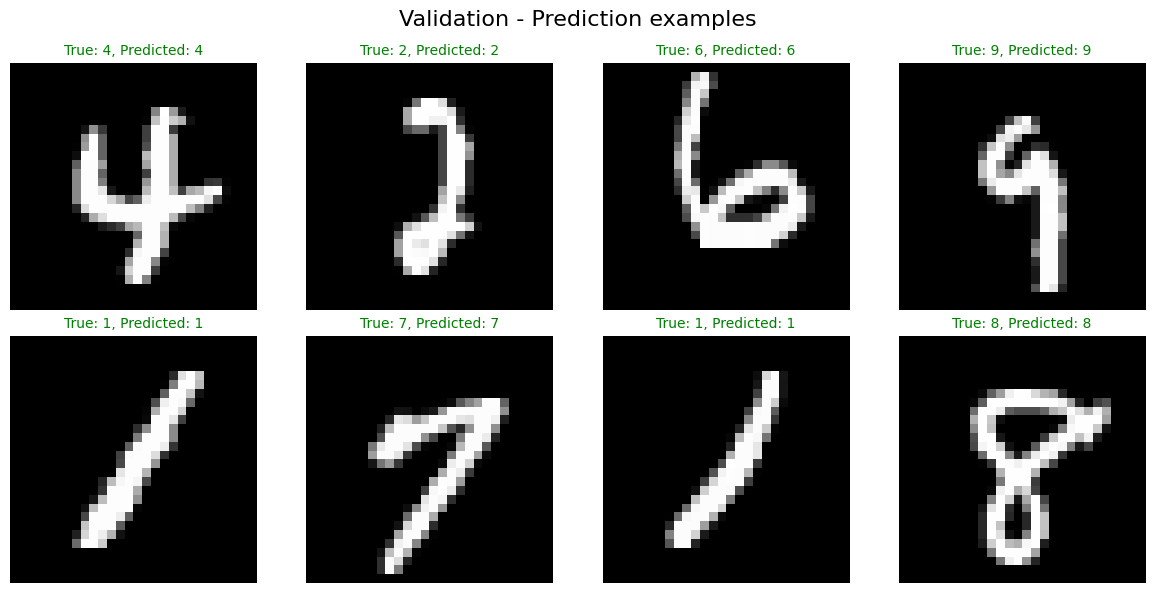


❌ 89 errors found out of 1000 samples
Error examples:


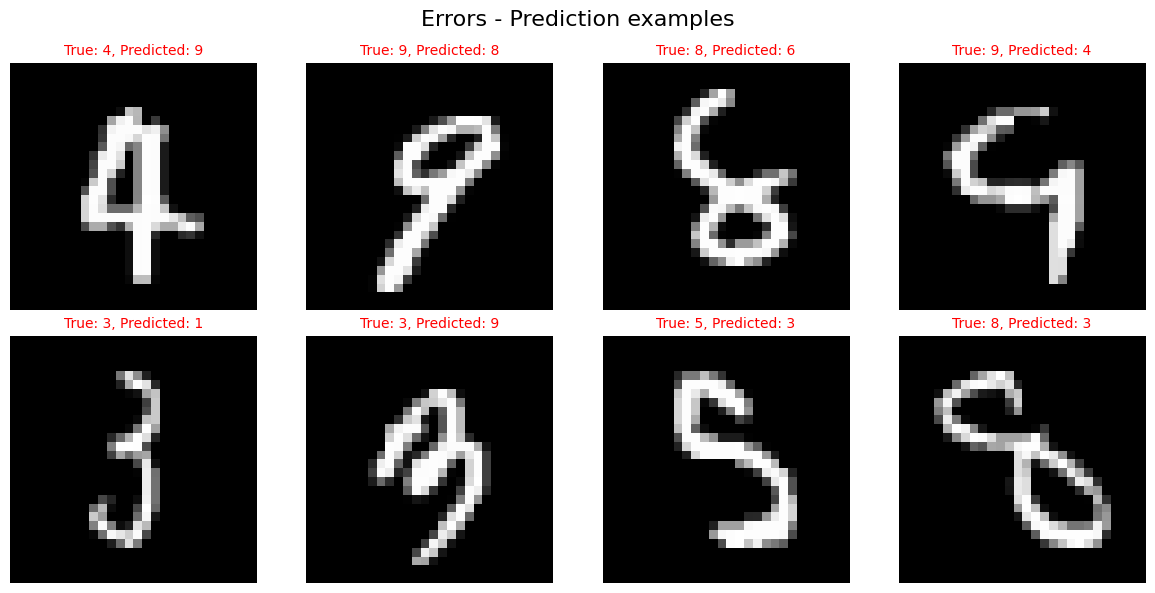

In [13]:
# 🎨 PREDICTION VISUALIZATION
print("🎨 Prediction visualization")
print("=" * 50)

def visualize_predictions(X, Y, predictions, num_examples=8, title_prefix=""):
    """Visualize prediction examples"""
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    fig.suptitle(f'{title_prefix} - Prediction examples', fontsize=16)
    
    for i in range(num_examples):
        row = i // 4
        col = i % 4
        
        # Reshape the image
        image = X[:, i].reshape(28, 28)
        
        # Display the image
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(f'True: {Y[i]}, Predicted: {predictions[i]}', 
                                fontsize=10)
        axes[row, col].axis('off')
        
        # Color the title based on prediction accuracy
        if Y[i] == predictions[i]:
            axes[row, col].title.set_color('green')
        else:
            axes[row, col].title.set_color('red')
    
    plt.tight_layout()
    plt.show()

# Visualize some validation examples
print("🔍 Validation set examples:")
visualize_predictions(X_dev, Y_dev, dev_predictions, 8, "Validation")

# Look for misclassified examples
incorrect_indices = np.where(dev_predictions != Y_dev)[0]
if len(incorrect_indices) > 0:
    print(f"\n❌ {len(incorrect_indices)} errors found out of {len(Y_dev)} samples")
    print("Error examples:")
    
    # Take the first 8 errors
    error_indices = incorrect_indices[:8] if len(incorrect_indices) >= 8 else incorrect_indices
    
    visualize_predictions(X_dev[:, error_indices], 
                         Y_dev[error_indices], 
                         dev_predictions[error_indices], 
                         len(error_indices), 
                         "Errors")
else:
    print("🎉 No errors found on the validation set!")

🎮 Interactive individual prediction testing
🎲 Testing 5 random samples:


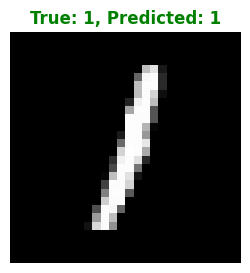

Test 1: ✅ CORRECT
------------------------------


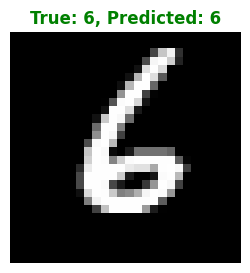

Test 2: ✅ CORRECT
------------------------------


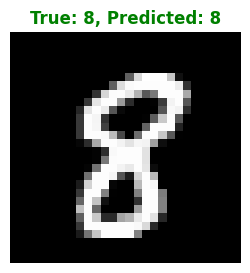

Test 3: ✅ CORRECT
------------------------------


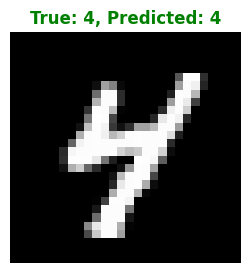

Test 4: ✅ CORRECT
------------------------------


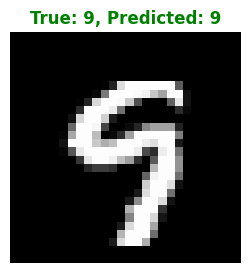

Test 5: ✅ CORRECT
------------------------------

🎯 Final summary:
Final validation accuracy: 91.10%
The model is ready to use! 🚀


In [14]:
# 🎮 INTERACTIVE PREDICTION TESTING
print("🎮 Interactive individual prediction testing")
print("=" * 50)

def test_random_predictions(num_tests=5):
    """Test random predictions"""
    print(f"🎲 Testing {num_tests} random samples:")
    
    for i in range(num_tests):
        # Choose a random index
        random_index = np.random.randint(0, X_dev.shape[1])
        
        # Make prediction
        prediction = make_predictions(X_dev[:, random_index, None], W1, b1, W2, b2)
        actual = Y_dev[random_index]
        
        # Display the image
        plt.figure(figsize=(3, 3))
        image = X_dev[:, random_index].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.title(f'True: {actual}, Predicted: {prediction[0]}', 
                 color='green' if actual == prediction[0] else 'red', 
                 fontsize=12, fontweight='bold')
        plt.axis('off')
        plt.show()
        
        # Result
        result = "✅ CORRECT" if actual == prediction[0] else "❌ INCORRECT"
        print(f"Test {i+1}: {result}")
        print("-" * 30)

# Run the test
test_random_predictions(5)

print("\n🎯 Final summary:")
print(f"Final validation accuracy: {dev_accuracy*100:.2f}%")
print("The model is ready to use! 🚀")